In [1]:
import numpy as np
X = np.array([[1, 2], [1.5, 3], [3.5, 4], [4, 5], [6, 2], [7, 5], [9, 4], [8, 2]])
y = [0, 0, 0, 0, 1, 1, 1, 1]

In [2]:
from sklearn.svm import SVC
# svm 선형 모형
model = SVC(kernel = 'linear')
model.fit(X, y)


SVC(kernel='linear')

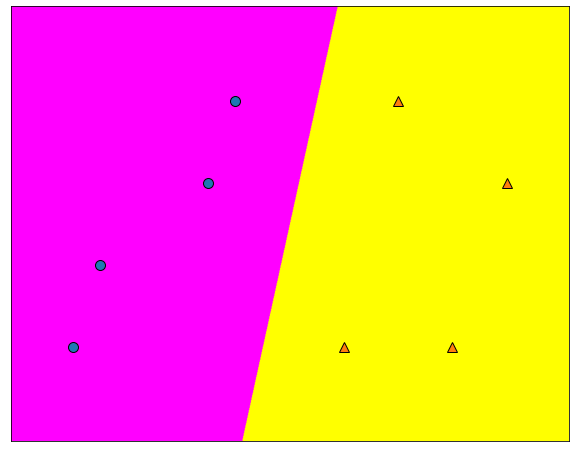

In [3]:
import mglearn
import matplotlib.pyplot as plt
plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, cm='spring')
mglearn.discrete_scatter(X[:,0], X[:,1], y) # 산점도

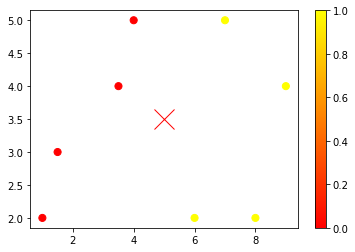

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# X 데이터는 어느 클래스로 분류될까요?
plt.plot([5], [3.5], 'x', color='red', markersize=20)
plt.colorbar()

In [5]:
print(model.predict([[5, 3.5]]))

[0]


In [6]:
#서포트 벡터의 좌표값
print(model.support_vectors_)

[[4. 5.]
 [6. 2.]
 [7. 5.]]


In [7]:
# 서포트의 인덱스
model.support_

array([3, 4, 5])

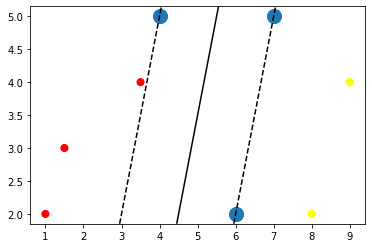

In [10]:
def plot_svc(model,ax=None):
    if ax==None:
        ax = plt.gca() # 새로운 그래픽 객체 생성
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # 그래프 그리드
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x) # 정방행렬(정사각형행렬)로 만들고
            # 세로로 붙임
    xy = np.vstack([X.ravel(), Y.ravel()]).T # 1차원으로 만들고 행렬 전치
    # 판별함수에 입력하고
    P = model.decision_function(xy).reshape(X.shape)
    # decision boundary와 margins
    #등고선그래프, 2차원 넘파이 배열
    ax.contour(X, Y, P, levels=[-1, 0, 1], colors='k', linestyles=['--', '-', '--'])
    # 서포트 벡터 출력
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=200)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc(model)